In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ds = xr.open_dataset("results.nc") 

# def field_da(da, field):
#     return xr.DataArray(
#         da.data[field],  
#         dims=da.dims,
#         coords=da.coords,
#         attrs=da.attrs,
#     )

# compound = [name for name, da in ds.data_vars.items() if da.dtype.fields]

# for name in compound:
#     da = ds[name]
#     ds[f"{name}_real"] = field_da(da, "r")
#     ds[f"{name}_imag"] = field_da(da, "i")
#     ds = ds.drop_vars(name)

# df = ds.to_dataframe()   
# df.to_csv('resources/diffraction_data.csv')

In [2]:
df = pd.read_csv('resources/diffraction_data.csv')
df

,omega,radiating_dof,influenced_dof,wave_direction,added_mass,radiation_damping,inertia_matrix,hydrostatic_stiffness,g,rho,...,wavenumber,wavelength,diffraction_force_real,diffraction_force_imag,Froude_Krylov_force_real,Froude_Krylov_force_imag,excitation_force_real,excitation_force_imag,RAO_real,RAO_imag
0,0.1,Surge,Surge,0.000000,238.259297,3.888155e-07,791.856048,0.0,9.81,1025.0,...,0.002337,2688.270531,8.905720e-08,-5.460331e+00,-4.547474e-13,-1.815217e+01,8.905674e-08,-2.361250e+01,2.316635e-12,2.292232e+00
1,0.1,Surge,Surge,0.261799,238.259297,3.888155e-07,791.856048,0.0,9.81,1025.0,...,0.002337,2688.270531,8.602265e-08,-5.274275e+00,0.000000e+00,-1.753365e+01,8.602265e-08,-2.280793e+01,2.195148e-12,2.214126e+00
2,0.1,Surge,Surge,0.523599,238.259297,3.888155e-07,791.856048,0.0,9.81,1025.0,...,0.002337,2688.270531,7.712581e-08,-4.728788e+00,0.000000e+00,-1.572025e+01,7.712581e-08,-2.044903e+01,1.968339e-12,1.985132e+00
3,0.1,Surge,Surge,1.570796,238.259297,3.888155e-07,791.856048,0.0,9.81,1025.0,...,0.002337,2688.270531,-1.110223e-16,-2.706169e-16,-4.547474e-13,-1.026956e-15,-4.548584e-13,-1.297573e-15,4.409849e-14,1.186694e-16
4,0.1,Surge,Surge,3.141593,238.259297,3.888155e-07,791.856048,0.0,9.81,1025.0,...,0.002337,2688.270531,-8.905720e-08,5.460331e+00,-4.547474e-13,1.815217e+01,-8.905765e-08,2.361250e+01,-2.228502e-12,-2.292232e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5.0,Yaw,Yaw,0.000000,150.222316,4.206169e+02,312.017176,0.0,9.81,1025.0,...,2.548420,2.465522,-1.705303e-13,3.552714e-13,2.842171e-14,9.094947e-13,-1.421085e-13,1.264766e-12,-2.467901e-17,-8.390715e-17
8996,5.0,Yaw,Yaw,0.261799,150.222316,4.206169e+02,312.017176,0.0,9.81,1025.0,...,2.548420,2.465522,5.057744e+02,2.347275e+02,1.166061e+03,9.663381e-13,1.671836e+03,2.347275e+02,-1.436128e-01,5.824015e-03
8997,5.0,Yaw,Yaw,0.523599,150.222316,4.206169e+02,312.017176,0.0,9.81,1025.0,...,2.548420,2.465522,7.856047e+02,4.076509e+02,2.175469e+03,8.526513e-13,2.961073e+03,4.076509e+02,-2.542366e-01,1.099258e-02
8998,5.0,Yaw,Yaw,1.570796,150.222316,4.206169e+02,312.017176,0.0,9.81,1025.0,...,2.548420,2.465522,-4.973799e-14,7.815970e-14,4.050094e-13,-2.842171e-14,3.552714e-13,4.973799e-14,-2.546568e-17,-1.580800e-17


## RAO Real

In [153]:
def plot_rao_freq(dof, wave_dirs, tol, rao_type):
    fig, axes = plt.subplots(1, len(wave_dirs), figsize=(4 * len(wave_dirs), 4), sharey=True)

    for i, wave_dir in enumerate(wave_dirs):
        filtered_df = df[
            (np.isclose(df['wave_direction'], wave_dir, atol=tol)) &
            (df['radiating_dof'] == dof)
        ]

        grouped_df = filtered_df.groupby('omega', as_index=False)[rao_type].mean()
        grouped_df = grouped_df.sort_values('omega')

        axes[i].plot(grouped_df['omega'], grouped_df[rao_type], linestyle='-')
        axes[i].set_ylabel(f'{rao_type} ({dof})')
        axes[i].grid(True)
        axes[i].set_title(f'wave_dir = {wave_dir:.2f} rad')

    axes[-1].set_xlabel('Omega (Frequency)')
    fig.suptitle(f'DOF = {dof}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def plot_rao_time(dof, wave_dirs, tol, rao_type):
    fig, axes = plt.subplots(1, len(wave_dirs), figsize=(4 * len(wave_dirs), 4), sharey=True)

    if len(wave_dirs) == 1:
        axes = [axes]

    for i, wave_dir in enumerate(wave_dirs):
        filtered_df = df[
            (np.isclose(df['wave_direction'], wave_dir, atol=tol)) &
            (df['radiating_dof'] == dof)
        ]

        grouped_df = filtered_df.groupby('omega', as_index=False)[rao_type].mean()
        grouped_df = grouped_df.sort_values('omega')

        rao_values = grouped_df[rao_type].values
        omega = grouped_df['omega'].values

        rao_full = np.concatenate([rao_values, rao_values[::-1]])
        impulse_response = np.fft.ifft(rao_full).real

        dt = 2 * np.pi / (omega[-1] * 2)  
        time = np.arange(len(impulse_response)) * dt
        
        axes[i].plot(time, impulse_response, linestyle='-')
        axes[i].set_title(f'wave_dir = {wave_dir:.2f} rad')
        axes[i].grid(True)

    axes[0].set_ylabel(f'Impulse Response ({dof})')
    for ax in axes:
        ax.set_xlabel('Time (s)')

    fig.suptitle(f'DOF = {dof}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()




## Frequency vs Time Domain

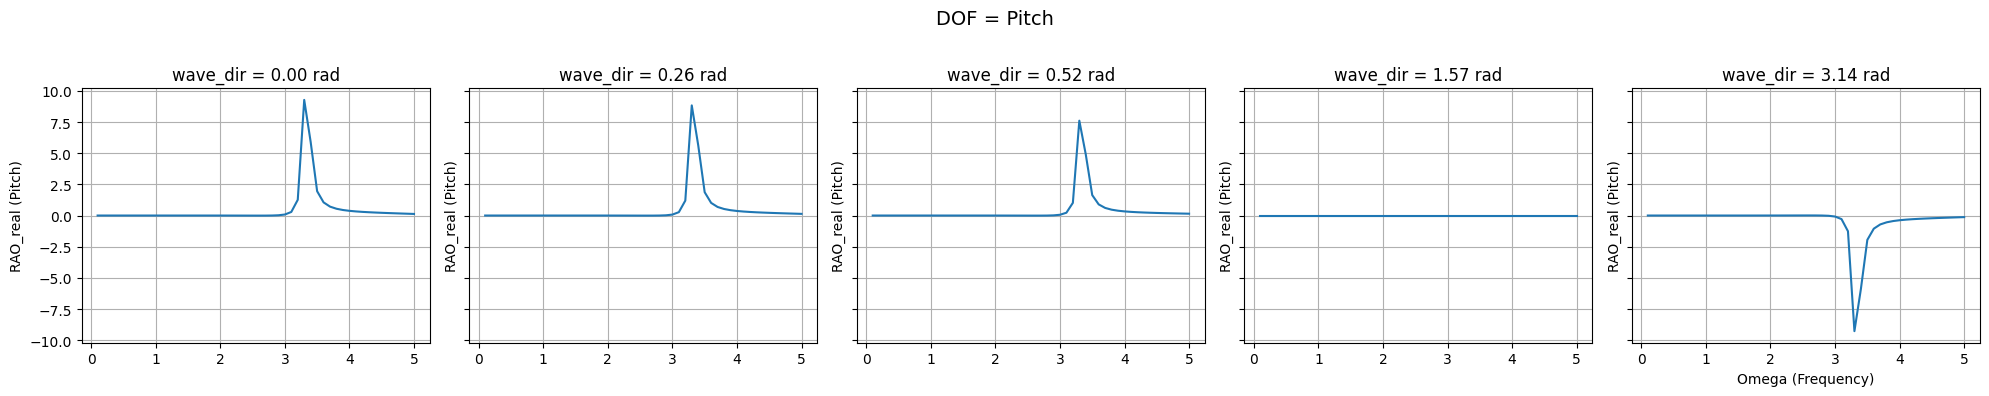

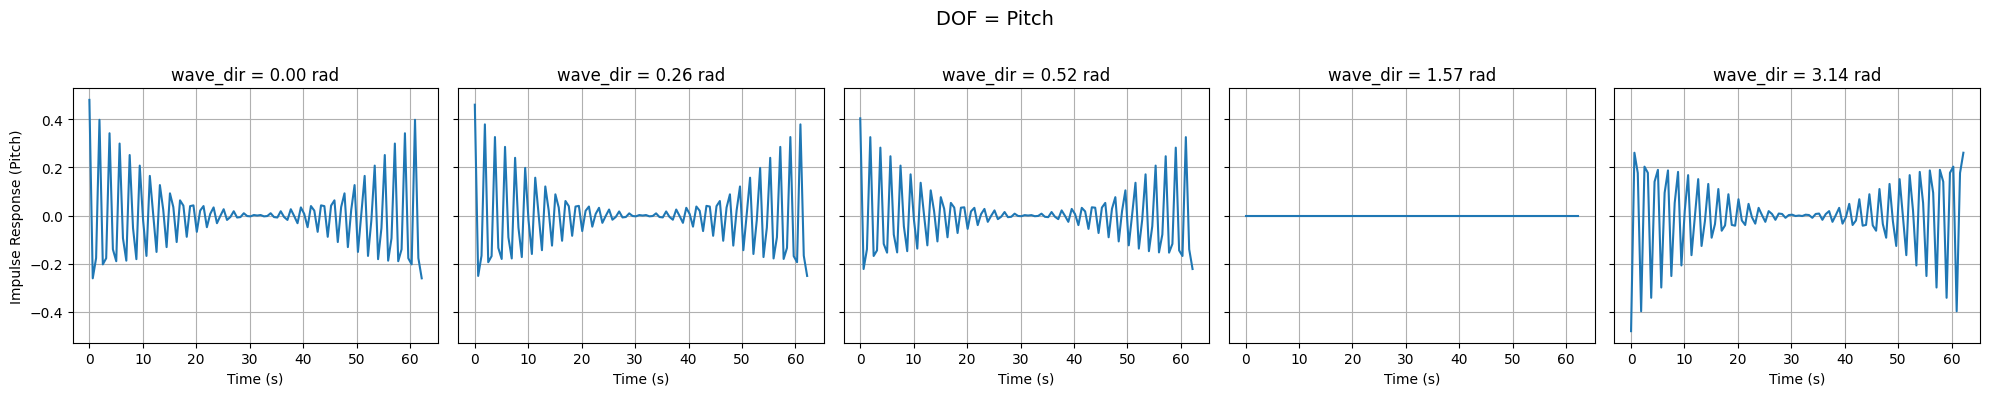

In [154]:
wave_dirs = [0, np.pi/12, np.pi/6, np.pi/2, np.pi]
plot_rao_freq("Pitch", wave_dirs, 1e-6, "RAO_real")
plot_rao_time("Pitch", wave_dirs, 1e-6, "RAO_real")

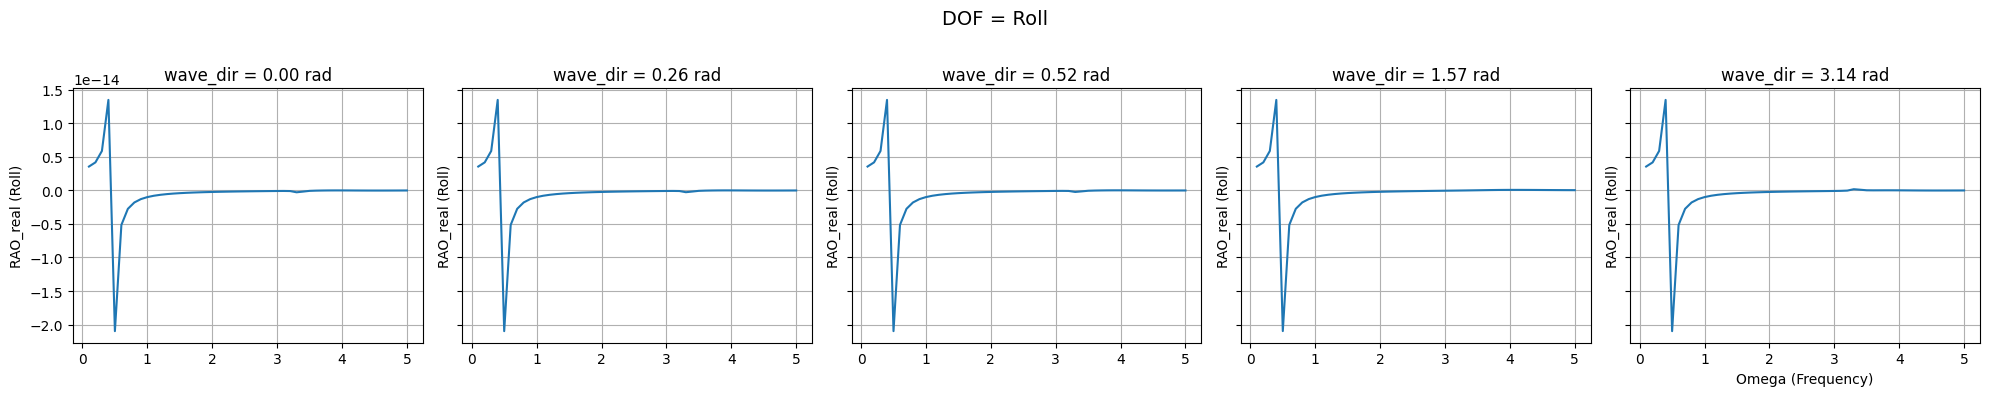

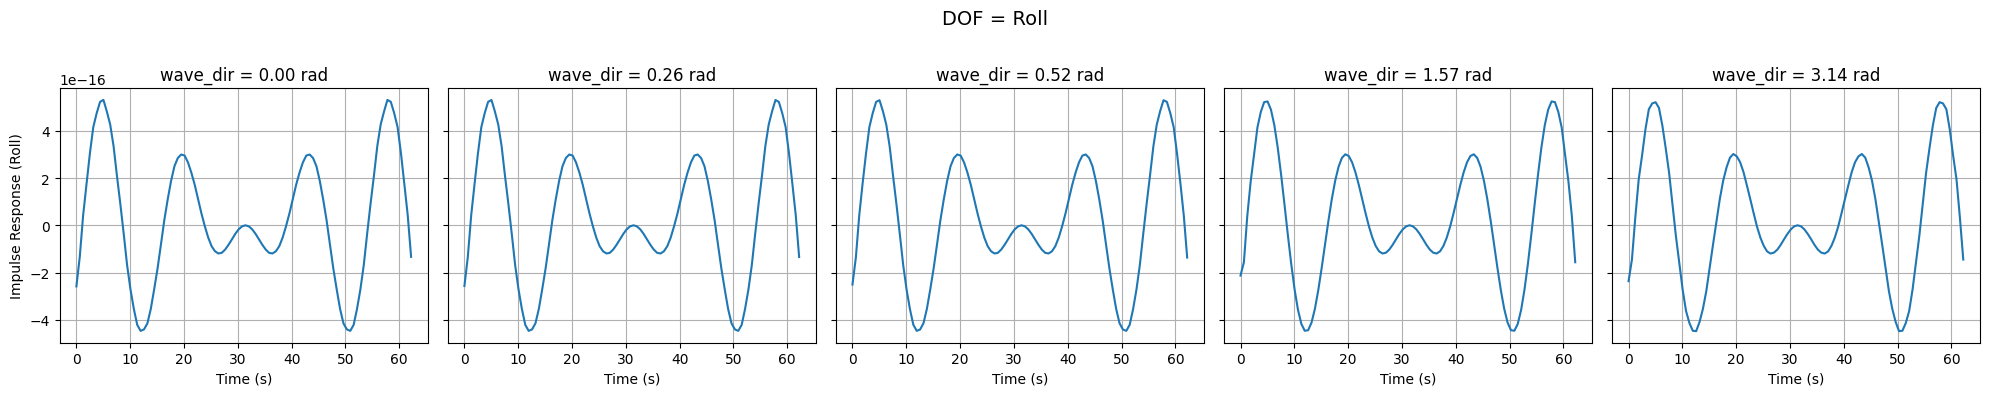

In [155]:
wave_dirs = [0, np.pi/12, np.pi/6, np.pi/2, np.pi]
plot_rao_freq("Roll", wave_dirs, 1e-6, "RAO_real")
plot_rao_time("Roll", wave_dirs, 1e-6, "RAO_real")

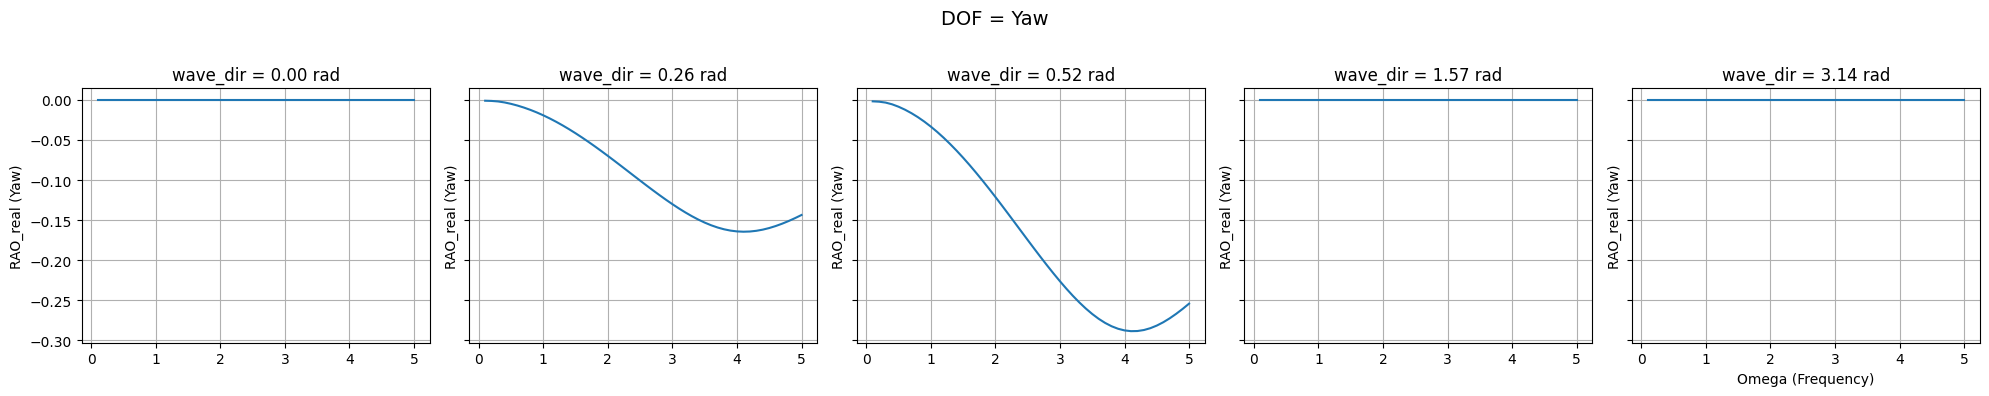

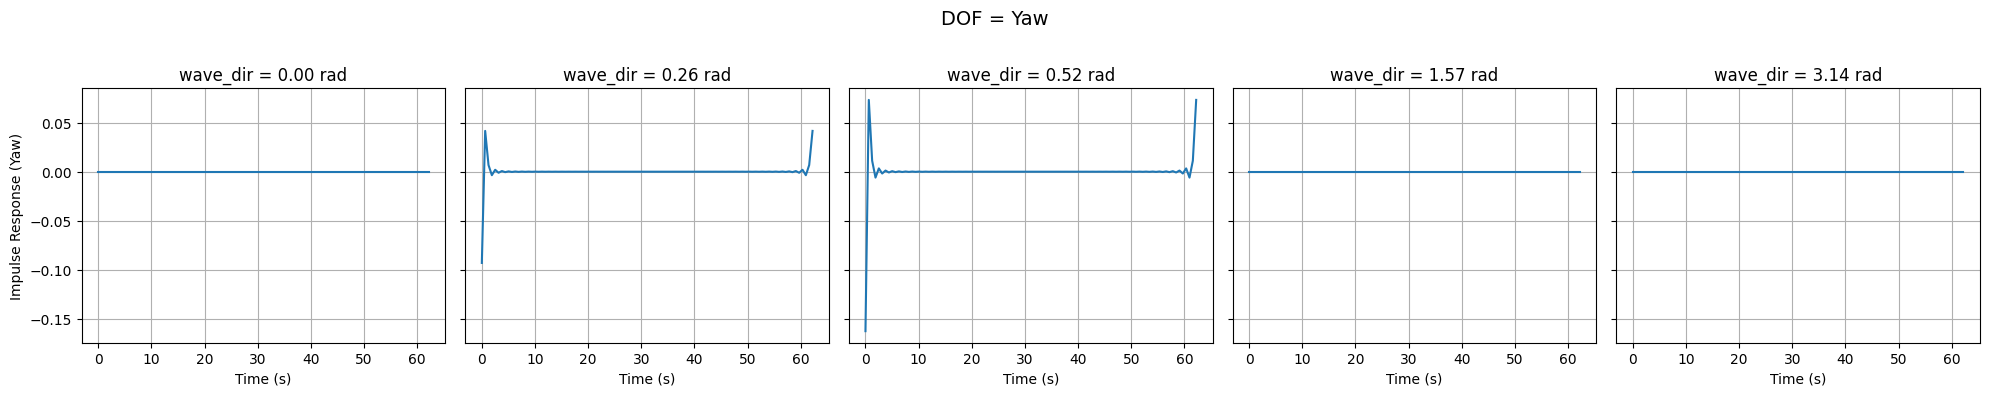

In [156]:
wave_dirs = [0, np.pi/12, np.pi/6, np.pi/2, np.pi]
plot_rao_freq("Yaw", wave_dirs, 1e-6, "RAO_real")
plot_rao_time("Yaw", wave_dirs, 1e-6, "RAO_real")

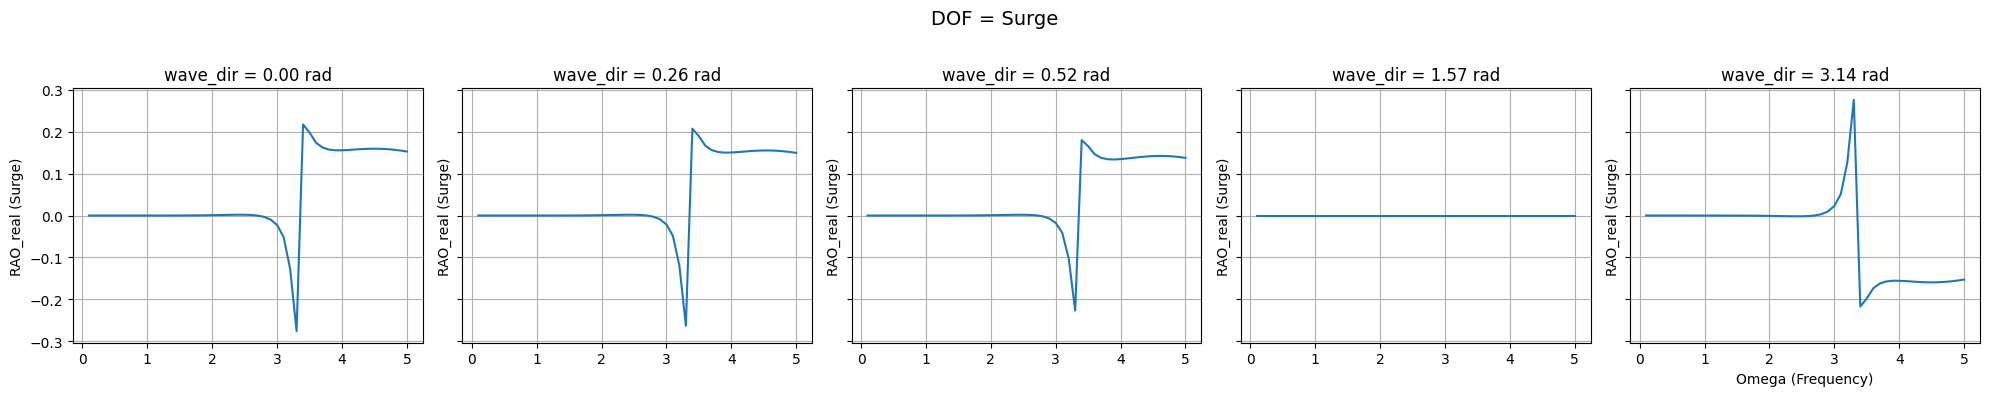

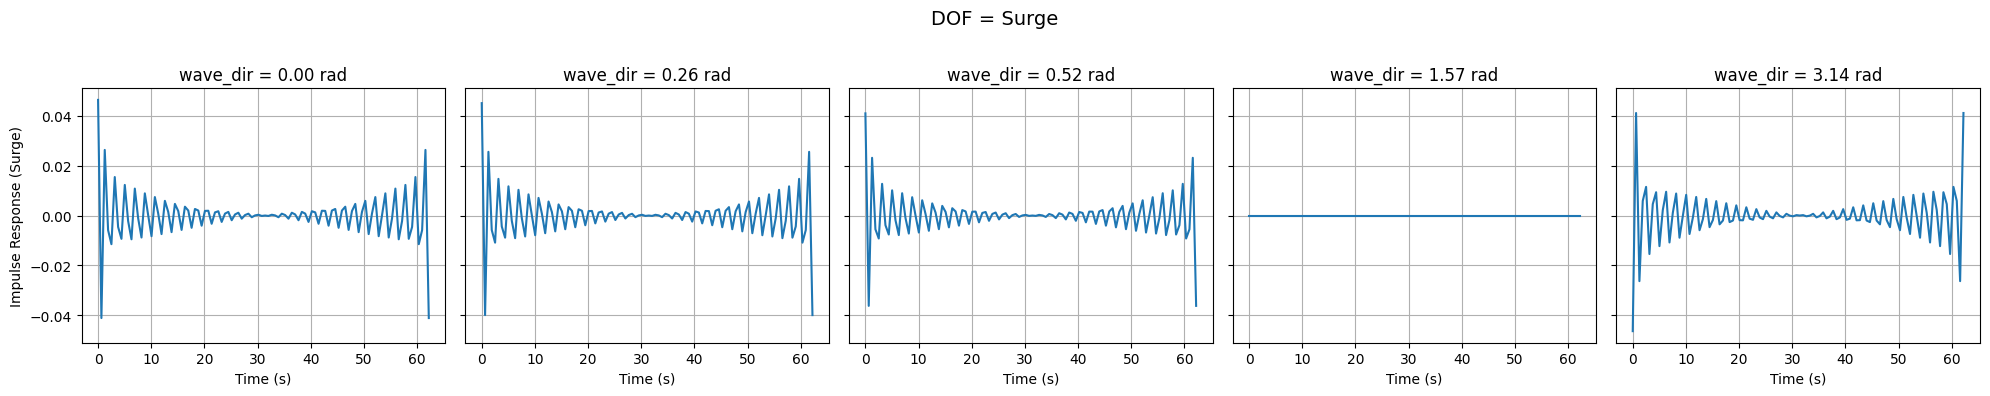

In [157]:
wave_dirs = [0, np.pi/12, np.pi/6, np.pi/2, np.pi]
plot_rao_freq("Surge", wave_dirs, 1e-6, "RAO_real")
plot_rao_time("Surge", wave_dirs, 1e-6, "RAO_real")

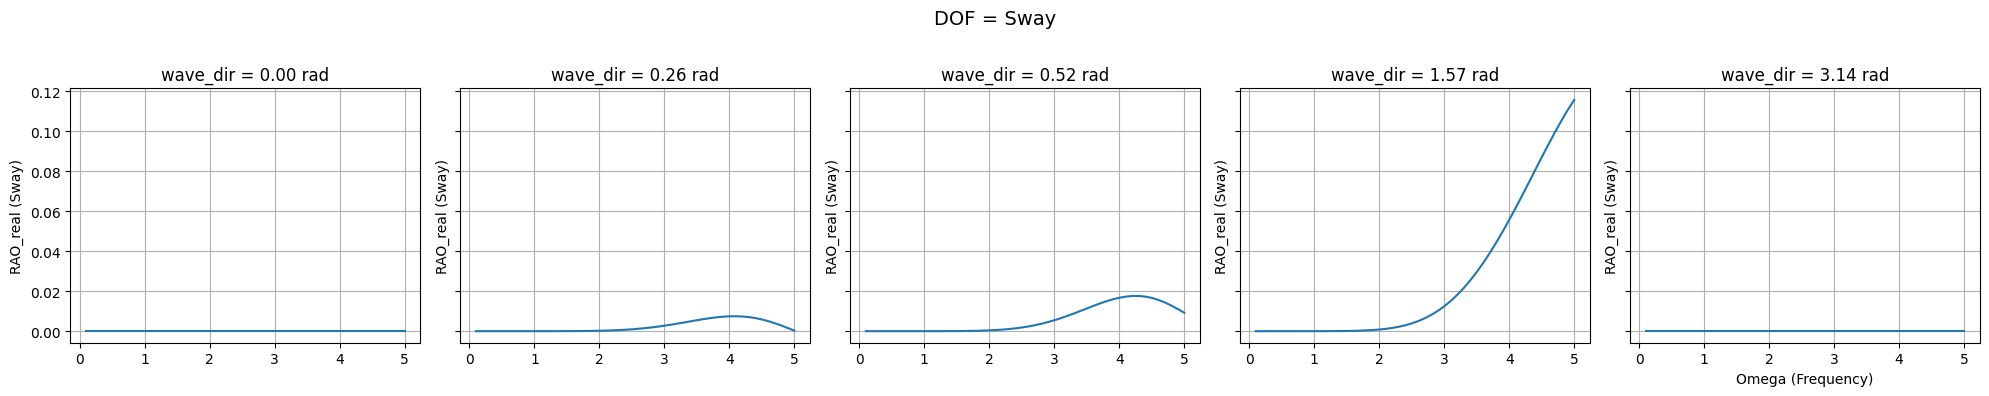

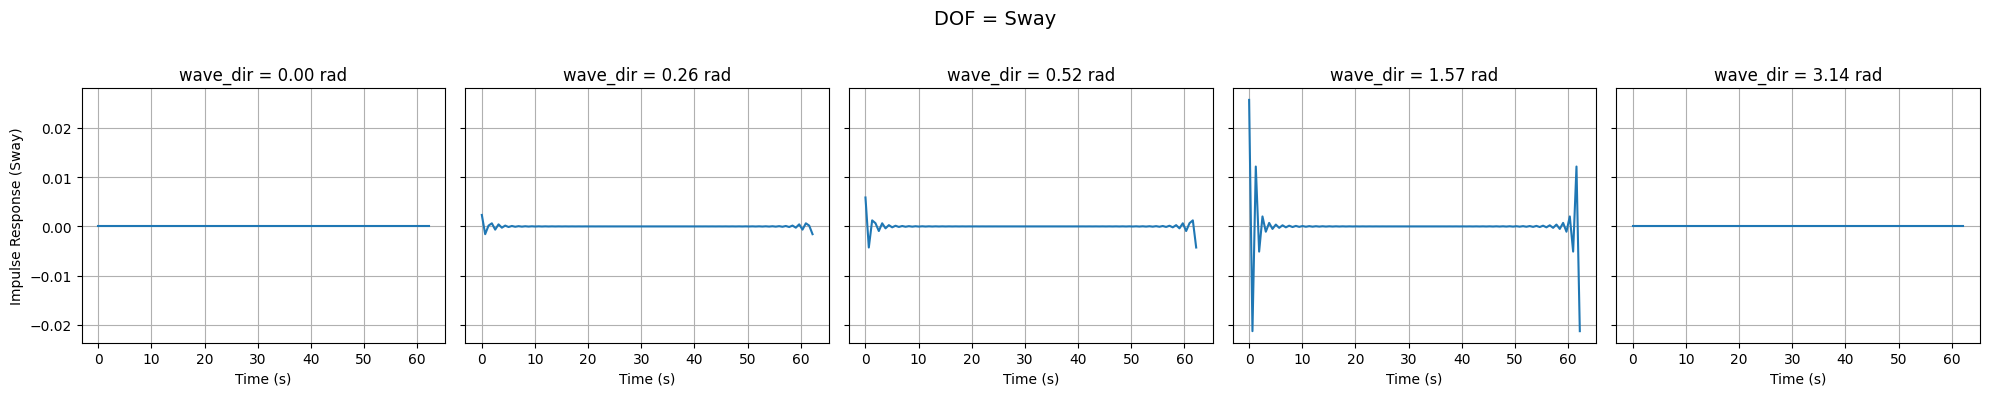

In [158]:
wave_dirs = [0, np.pi/12, np.pi/6, np.pi/2, np.pi]
plot_rao_freq("Sway", wave_dirs, 1e-6, "RAO_real")
plot_rao_time("Sway", wave_dirs, 1e-6, "RAO_real")

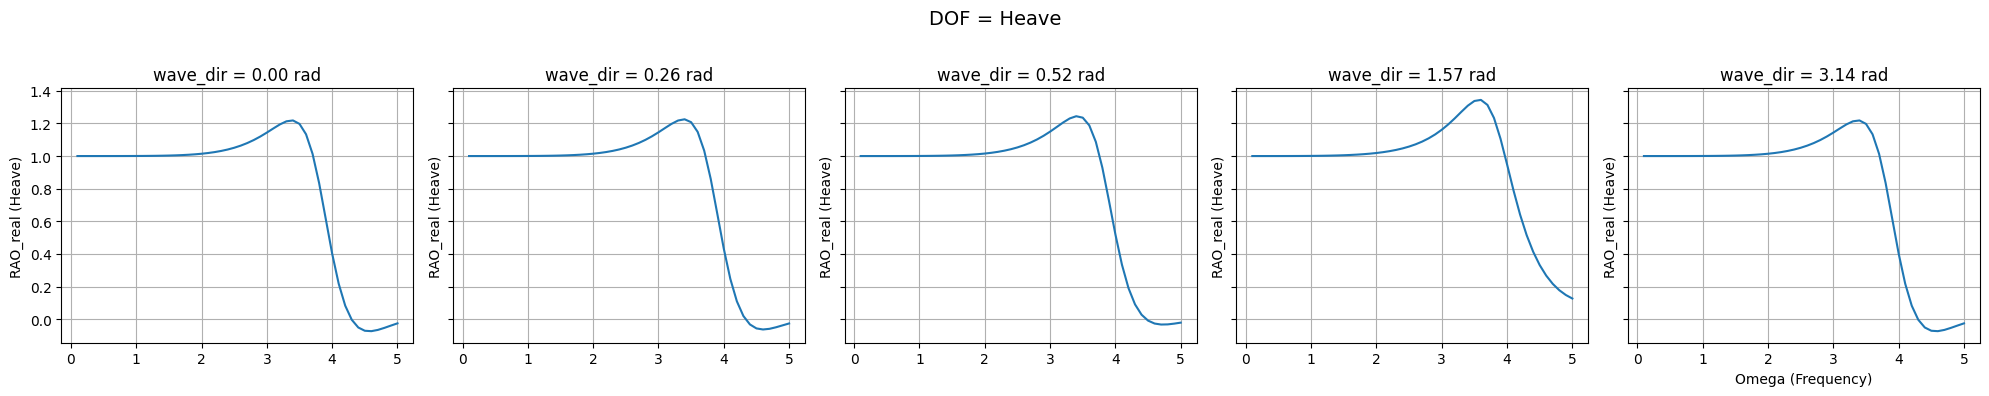

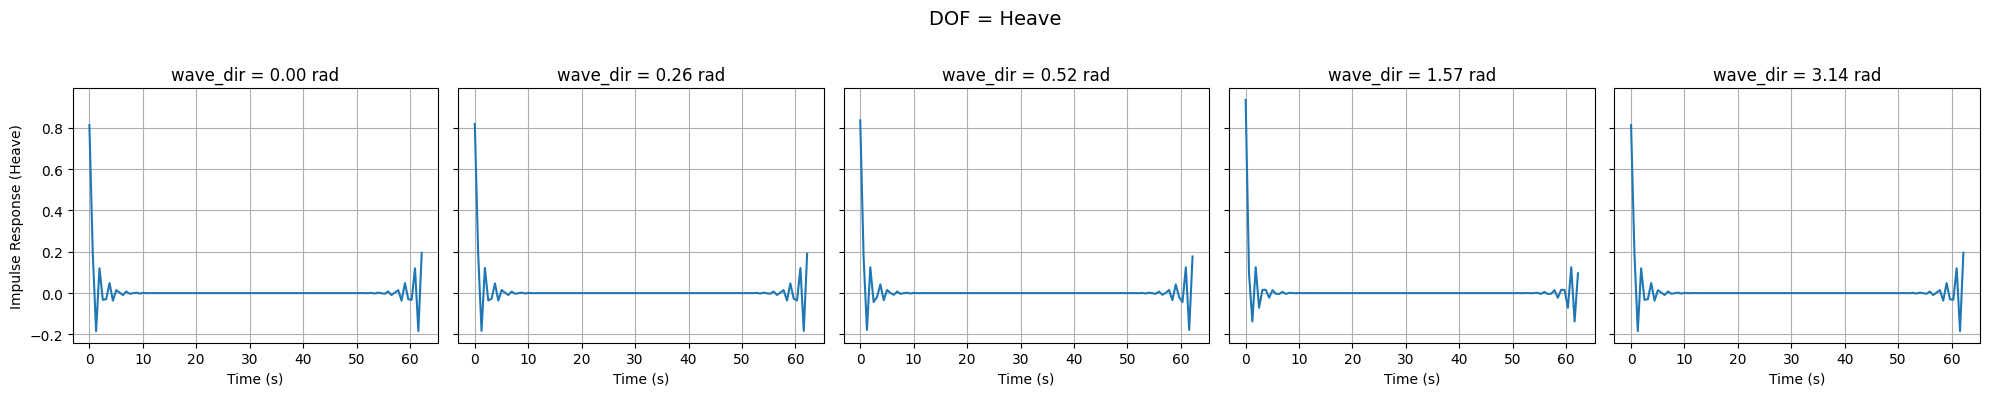

In [159]:
wave_dirs = [0, np.pi/12, np.pi/6, np.pi/2, np.pi]
plot_rao_freq("Heave", wave_dirs, 1e-6, "RAO_real")
plot_rao_time("Heave", wave_dirs, 1e-6, "RAO_real")